In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import json
import numpy as np
import itertools



First, we are going to generate complete graph data with random position and weights to test our algorithms onto.

In [3]:
# Function to generate a complete graph with random weights
def generate_complete_graph_with_weights(n,weight_range):
   # Create a complete graph with n nodes
   G = nx.complete_graph(n)
   
   # Assign random weights to each edge
   for (u, v) in G.edges():
      G.edges[u, v]['weight'] = np.random.uniform(1, weight_range)  # Random weight between 1 and 10
   
   return G

In [4]:
# Parameters
n = 10  # Number of nodes
weight_range = 10  # highest value the weight can go

# Generate graphs
complete_graph = generate_complete_graph_with_weights(n,weight_range)

In [15]:
np.random.seed(421)  # Seed for reproducibility
positions = {node: (np.random.uniform(), np.random.uniform()) for node in complete_graph.nodes()}

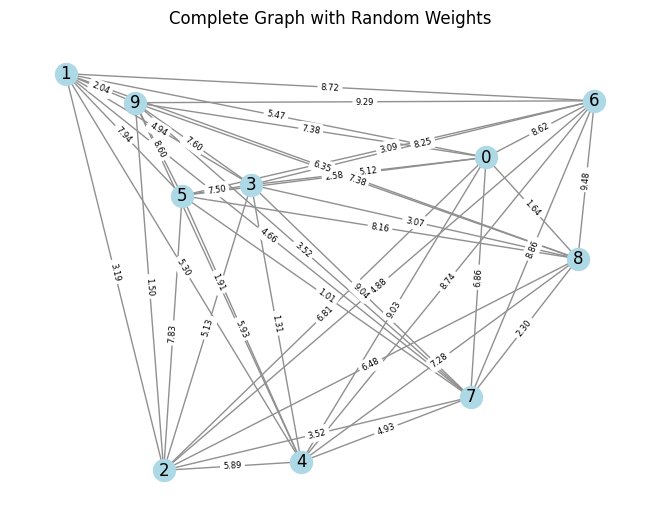

In [16]:
# Drawing the graph
nx.draw(complete_graph, positions, with_labels=True, node_color='lightblue', edge_color='#909090', node_size=250)
labels = {edge: f'{weight:.2f}' for edge, weight in nx.get_edge_attributes(complete_graph, 'weight').items()}
nx.draw_networkx_edge_labels(complete_graph, positions, edge_labels=labels, font_size=6) 

# Show the graph
plt.title('Complete Graph with Random Weights')
plt.show()

In [18]:
#print(complete_graph.edges(data=True))
for node, pos in positions.items():
    print(f"{node}: {pos}")
node_connection_info = []
for (u, v, weight) in complete_graph.edges(data='weight'):
    node_connection_info.append([u,v,weight])
print(node_connection_info)

0: (0.682782012116756, 0.8033108674180206)
1: (0.05627513121462424, 0.9884773655240955)
2: (0.20252222877101977, 0.11106872140751178)
3: (0.332953795313925, 0.7426092423099973)
4: (0.4073783777742175, 0.1298869365750257)
5: (0.229964523578139, 0.718716448079359)
6: (0.8441844766779014, 0.9284323100787218)
7: (0.6596453958946334, 0.2729863525676218)
8: (0.8194341868833496, 0.5789912331986956)
9: (0.16002067662433772, 0.9242314641967556)
[[0, 1, 5.465825277954722], [0, 2, 6.810095838395094], [0, 3, 5.118943315162036], [0, 4, 9.025577611340415], [0, 5, 2.5836677730154354], [0, 6, 8.619570772517154], [0, 7, 6.8610884728057595], [0, 8, 1.636270408776673], [0, 9, 7.3768113366593395], [1, 2, 3.1917028608690394], [1, 3, 4.940473546982013], [1, 4, 5.303228431617676], [1, 5, 7.9396707453249515], [1, 6, 8.720495512338271], [1, 7, 4.655134516007205], [1, 8, 6.353480489464386], [1, 9, 2.0400012923015494], [2, 3, 5.130913747473823], [2, 4, 5.893285655465771], [2, 5, 7.828602630971659], [2, 6, 4.8807

Let's now solve the TSP problem classically

In [20]:
# Distance matrix
# best solution example : 67+25+83
#  c1 c2 c3
#c1 1  1     # from city 1 to city 1, from city 1 to city 2
#c2      1   # from city 2 to city 3
#c3 1        # from city 3 to city 1
distances = [
    [0, 67, 83],
    [67, 0, 25],
    [83, 25, 0]
]

In [21]:

# Generate all permutations of the cities, excluding the first city to fix the starting point
perms = list(itertools.permutations(range(1, len(distances))))

# Initialize minimum distance to a large number
min_distance = float('inf')
best_route = None

# Check each permutation
for perm in perms:
    # Include the starting city at the beginning and the end to complete the cycle
    route = (0,) + perm + (0,)
    # Calculate the total distance of the current permutation
    current_distance = sum(distances[route[i]][route[i+1]] for i in range(len(route) - 1))
    
    # Update minimum distance and best route
    if current_distance < min_distance:
        min_distance = current_distance
        best_route = route

min_distance, best_route


(175, (0, 1, 2, 0))